In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

import pandas as pd
from numpy.random import random
import datetime as dt
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
from scipy.signal import periodogram
import math

from pytsviz.viz import *

In [3]:
dataset_size=366

In [4]:
n_features = 3

Target series

In [5]:
t_axis = pd.date_range(start='1/1/2020', periods = dataset_size, freq="D", name="t")

In [6]:
y = (1 + random(dataset_size)) * np.linspace(6, 9, dataset_size) + \
    (1 + random(dataset_size)) * np.sin(np.linspace(0, 10*np.pi, dataset_size)) + \
    (1.5 + random(dataset_size)) * np.cos(np.linspace(0, 5.4*np.pi, dataset_size))
ts = pd.Series(index=t_axis, data=y, name="y")
ts_df = ts.to_frame()

Features

In [7]:
feat_matrix = random((n_features, dataset_size))
feat_df = pd.DataFrame(index=t_axis, data={f"x_{i}": feat_matrix[i] for i in range(n_features)})

Forecast

In [8]:
ext_t_axis = pd.date_range(start='2/1/2020', periods = dataset_size, freq="D", name="t")

In [9]:
y_hat = y * (1 + 0.1 * random())

forecast = pd.Series(index=ext_t_axis, data=y_hat, name="y_hat")
forecast_df = forecast.to_frame()

In [10]:
c_lower = [y_hat[i] - (0.001 * i) ** 1.2 for i in range(len(y_hat))]
c_upper = [y_hat[i] + (0.001 * i) ** 1.2 for i in range(len(y_hat))]
confidence_df = pd.DataFrame(index=ext_t_axis, data={"lower confidence": c_lower, "upper confidence": c_upper})

In [11]:
total_df = pd.concat([ts, feat_df, forecast_df, confidence_df], axis = 1)

In [12]:
total_df

y       x_0       x_1       x_2      y_hat  \
t                                                                
2020-01-01   8.866037  0.494459  0.048840  0.372376        NaN   
2020-01-02   9.555986  0.360811  0.727753  0.077932        NaN   
2020-01-03  12.365451  0.008661  0.736493  0.571972        NaN   
2020-01-04  13.896604  0.888182  0.859786  0.157650        NaN   
2020-01-05  11.760632  0.344013  0.603210  0.088264        NaN   
...               ...       ...       ...       ...        ...   
2021-01-27        NaN       NaN       NaN       NaN   8.068709   
2021-01-28        NaN       NaN       NaN       NaN  17.307167   
2021-01-29        NaN       NaN       NaN       NaN  18.105368   
2021-01-30        NaN       NaN       NaN       NaN  12.995670   
2021-01-31        NaN       NaN       NaN       NaN  15.261694   

            lower confidence  upper confidence  
t                                               
2020-01-01               NaN               NaN  
2020-01-02               NaN               NaN  
2020-01-03               NaN               NaN  
2020-01-04               NaN               NaN  
2020-01-05               NaN               NaN  
...                      ...               ...  
2021-01-27          7.774261          8.363157  
2021-01-28         17.011740         17.602594  
2021-01-29         17.808961         18.401774  
2021-01-30         12.698283         13.293057  
2021-01-31         14.963327         15.560062  

[397 rows x 7 columns]

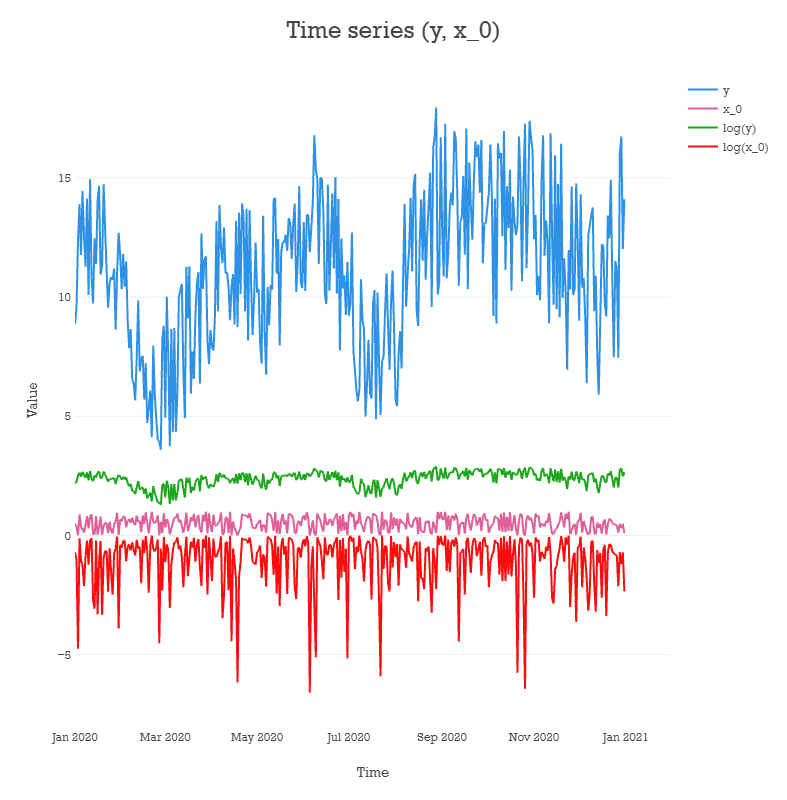

In [13]:
fig = plot_ts(total_df, y_cols=["y", "x_0"], tf="log", tf_args = (np.e,), keep_original=True)

In [14]:
func1 = lambda x : x.isocalendar().week
func2 = lambda x : x.isocalendar().day

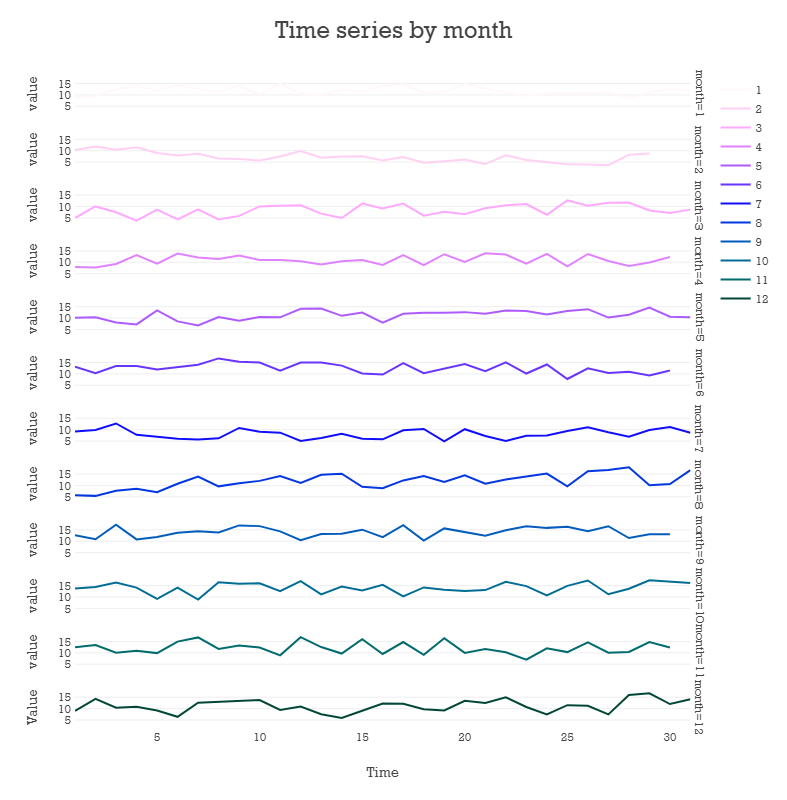

In [15]:
plot_seasonal_ts(ts_df, period="month", subplots=True)

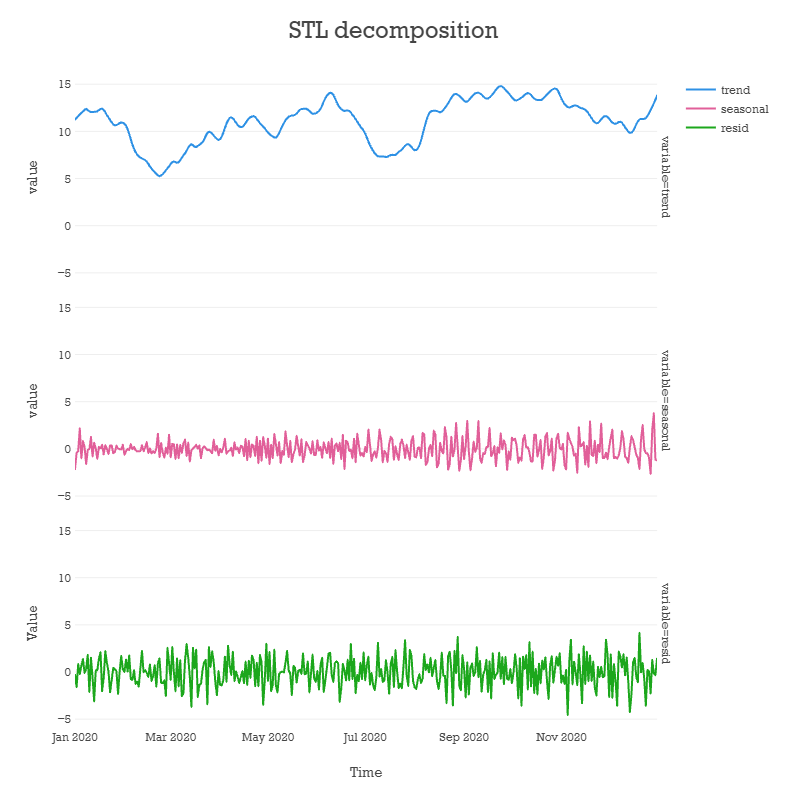

In [16]:
plot_decomposed_ts(ts_df, method = "STL", subplots = True)

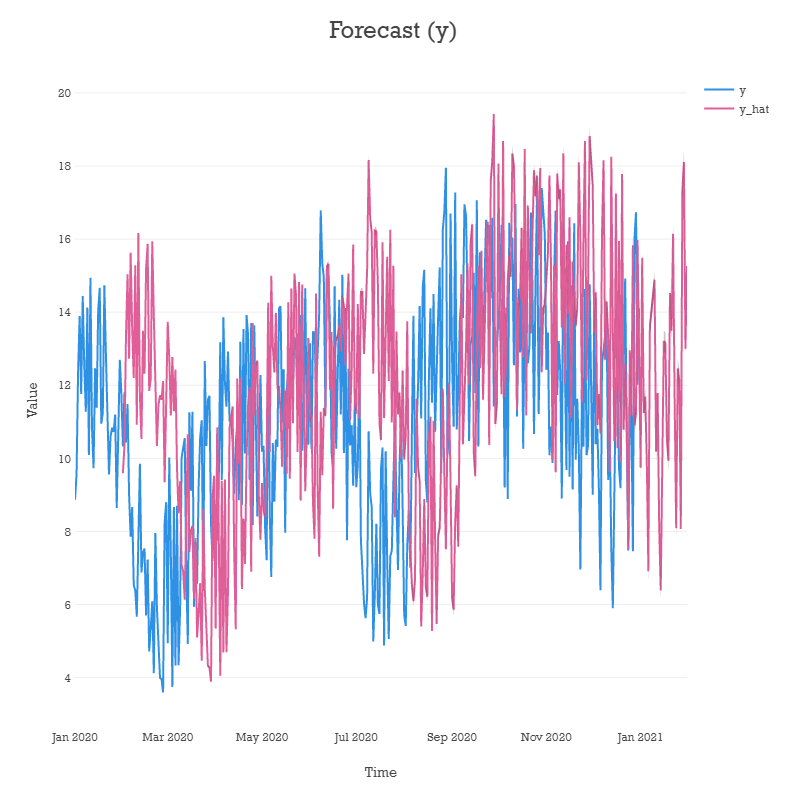

In [17]:
inverted_df = pd.DataFrame(total_df.values[::-1], total_df.index, total_df.columns)
#forecast_plot(inverted_df, ts_col = "y", fc_cols = ["y_hat"], lower_col = "lower confidence", upper_col = "upper confidence")

y_hat_2 = pd.Series(data=y_hat*0.9, index = ext_t_axis, name = "y_hat_2")
multiple_fc_df = pd.concat([total_df, y_hat_2], axis = 1)
plot_forecast(multiple_fc_df, y_col = "y", fc_cols = ["y_hat"], upper_col = "upper confidence", lower_col = "lower confidence")

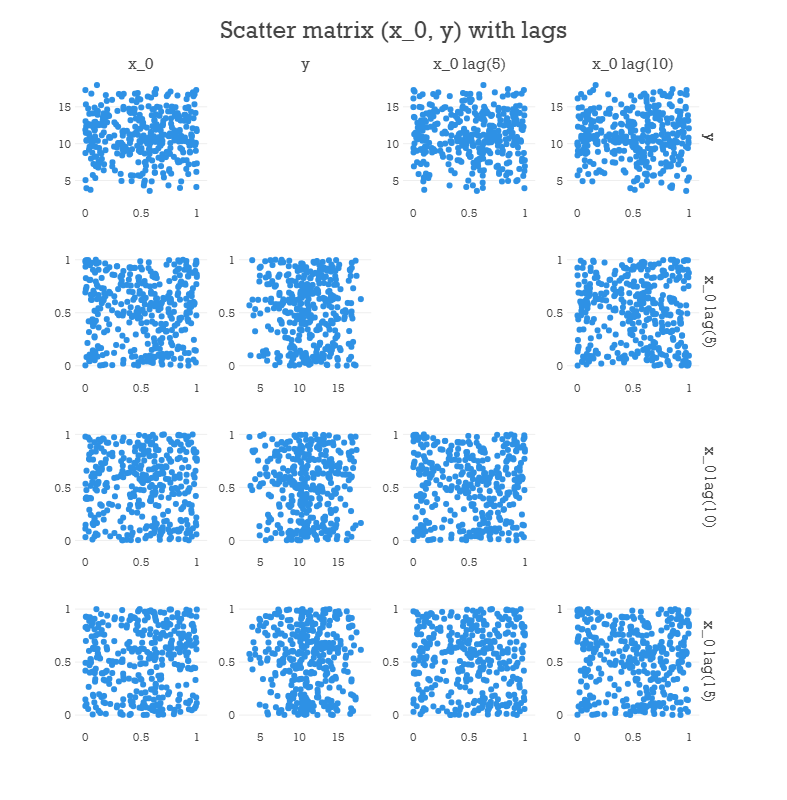

In [18]:
plot_scatter_matrix(total_df, var1 = "x_0", var2="y", lags1 = [5, 10, 15])

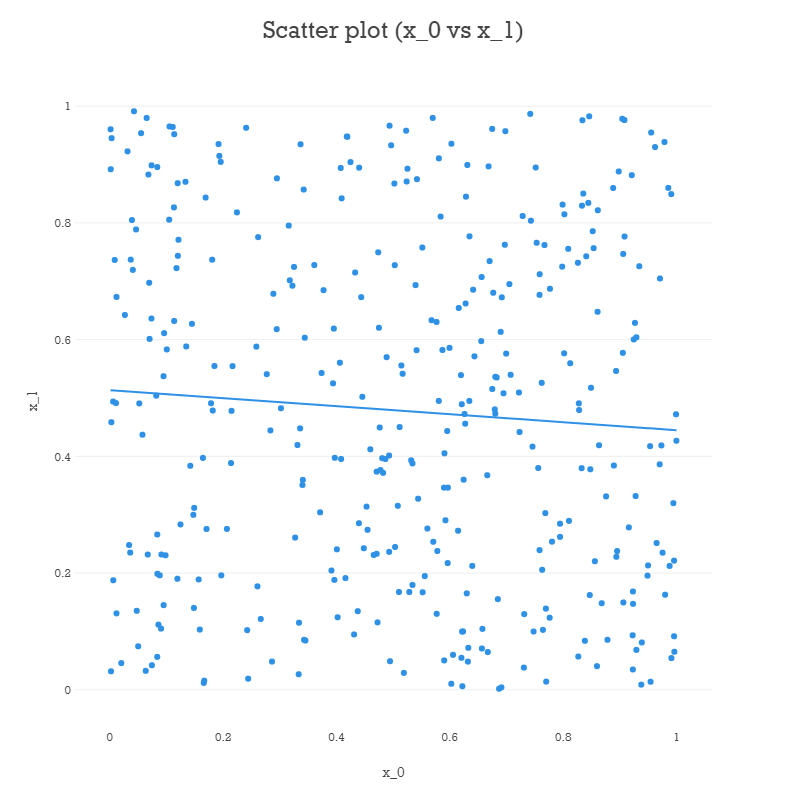

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.735
Date:                Tue, 02 Mar 2021   Prob (F-statistic):              0.189
Time:                        14:05:40   Log-Likelihood:                -72.731
No. Observations:                 366   AIC:                             149.5
Df Residuals:                     364   BIC:                             157.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5132      0.031     16.603      0.0

In [19]:
plot_scatter_fit(total_df, "x_0", "x_1", fit = "summary")

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



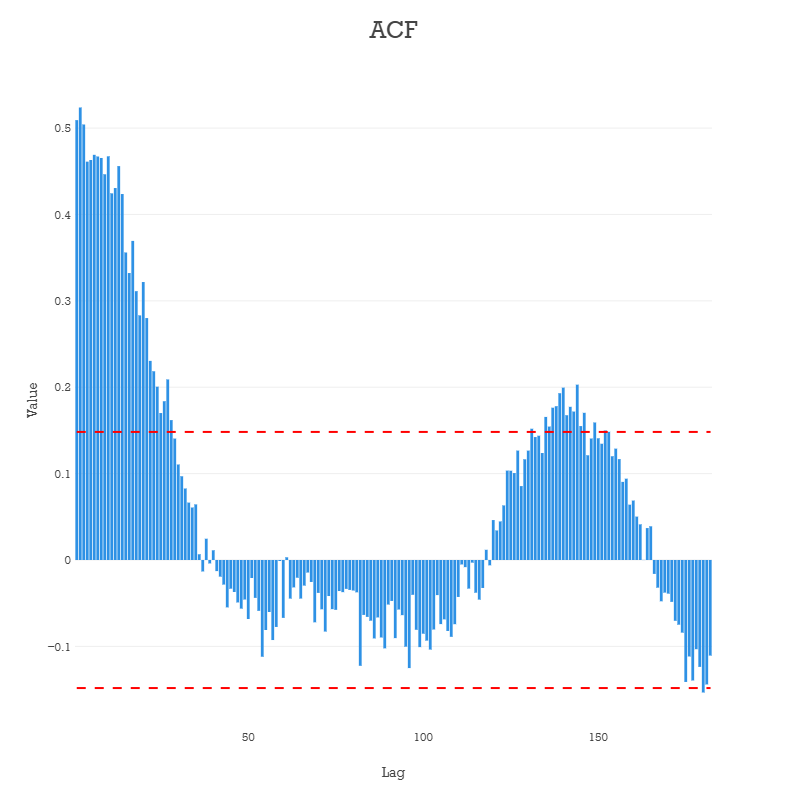

In [20]:
plot_acf(ts_df, show_threshold = True)

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



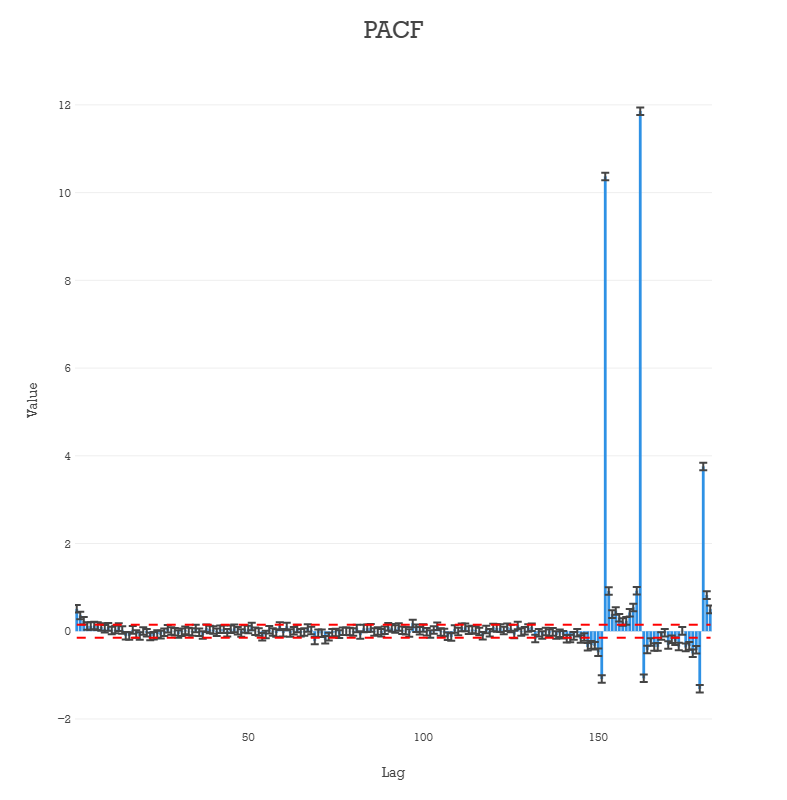

In [21]:
plot_acf(ts_df, partial=True, alpha = 0.1, show_threshold = True)

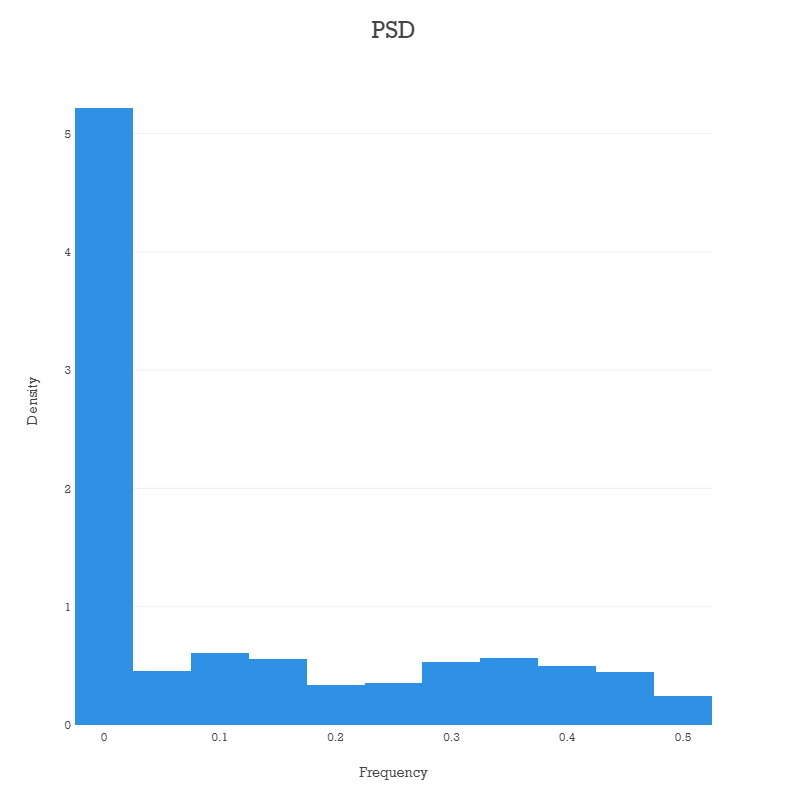

In [22]:
plot_psd(ts_df, scaling="spectrum")

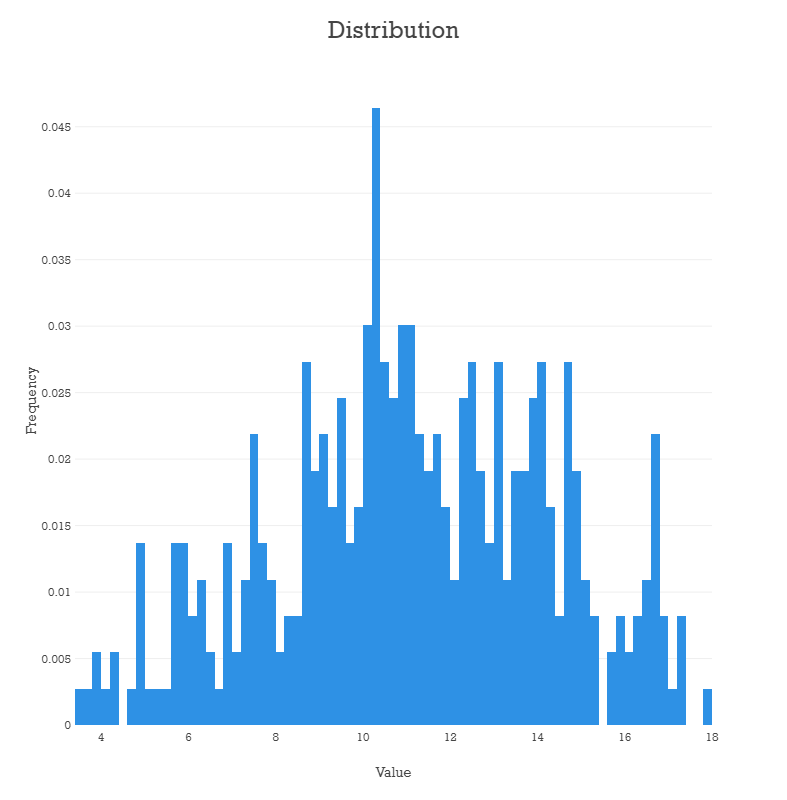

In [23]:
plot_distribution(total_df, bins=100, title="Distribution")

In [24]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar, ma)

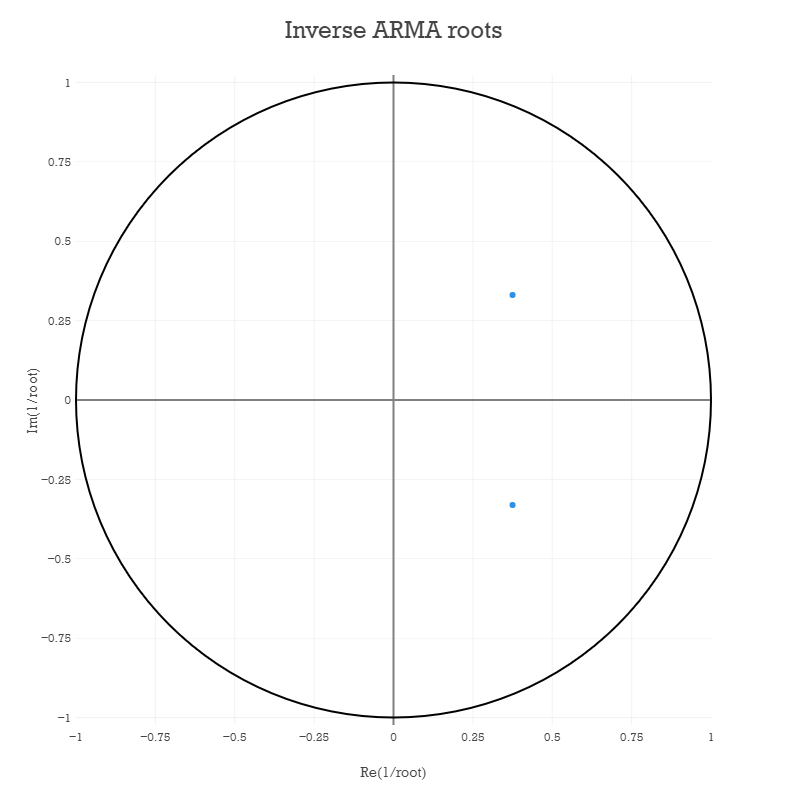

In [25]:
plot_inverse_arma_roots(arma_process)

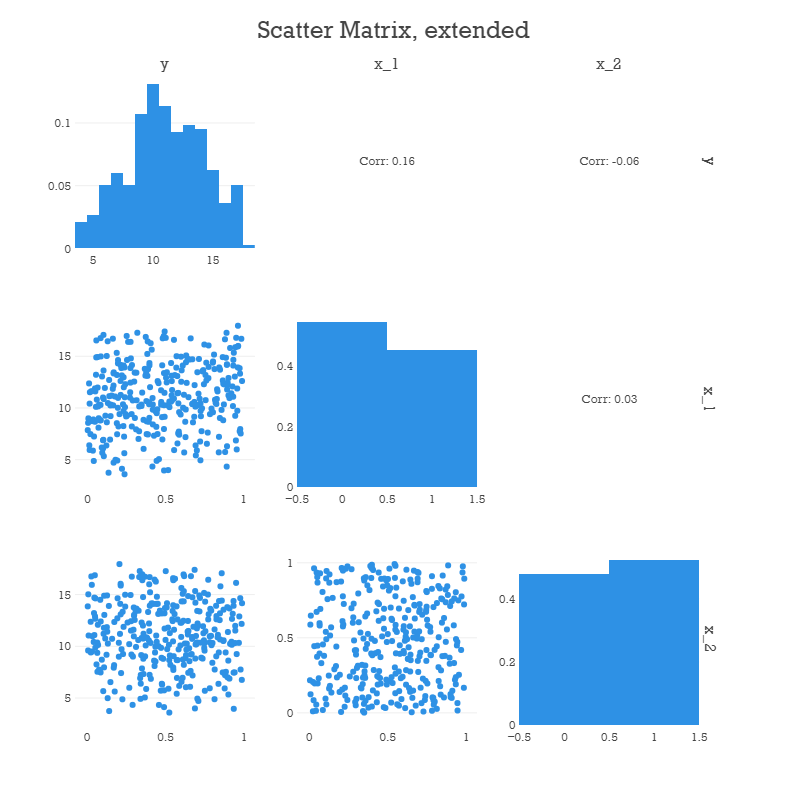

In [26]:
plot_extended_scatter_matrix(total_df.dropna(), y_cols=["y", "x_1", "x_2"])

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



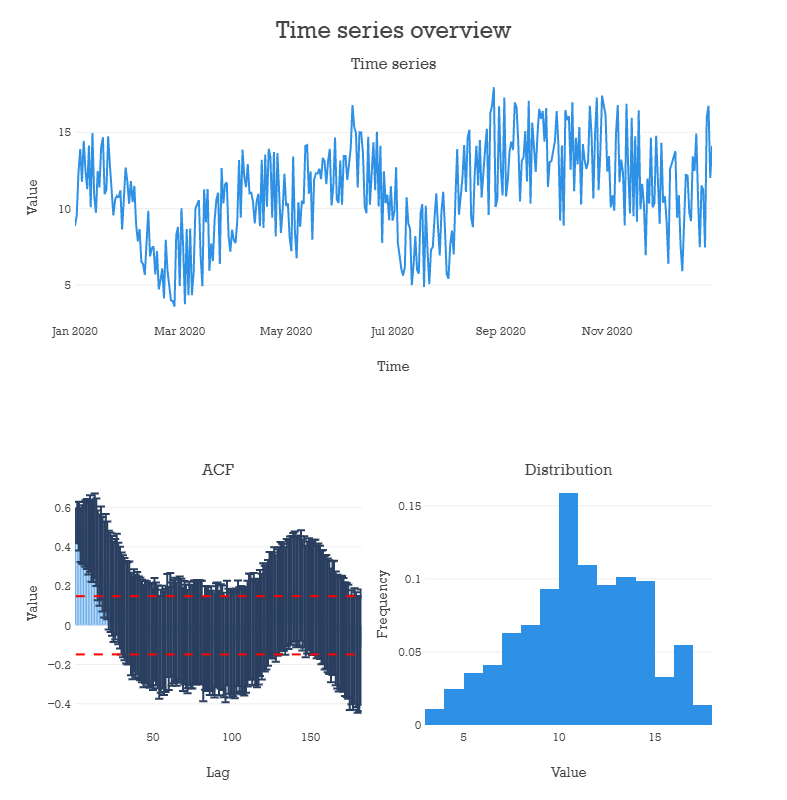

In [27]:
plot_ts_overview(ts_df)

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



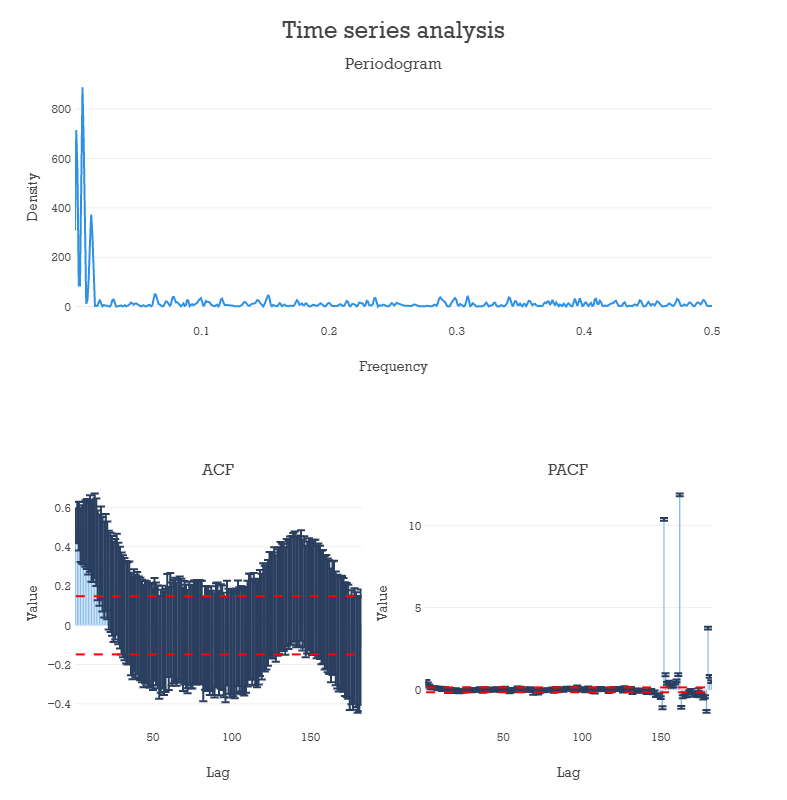

In [28]:
plot_ts_analysis(ts_df)

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



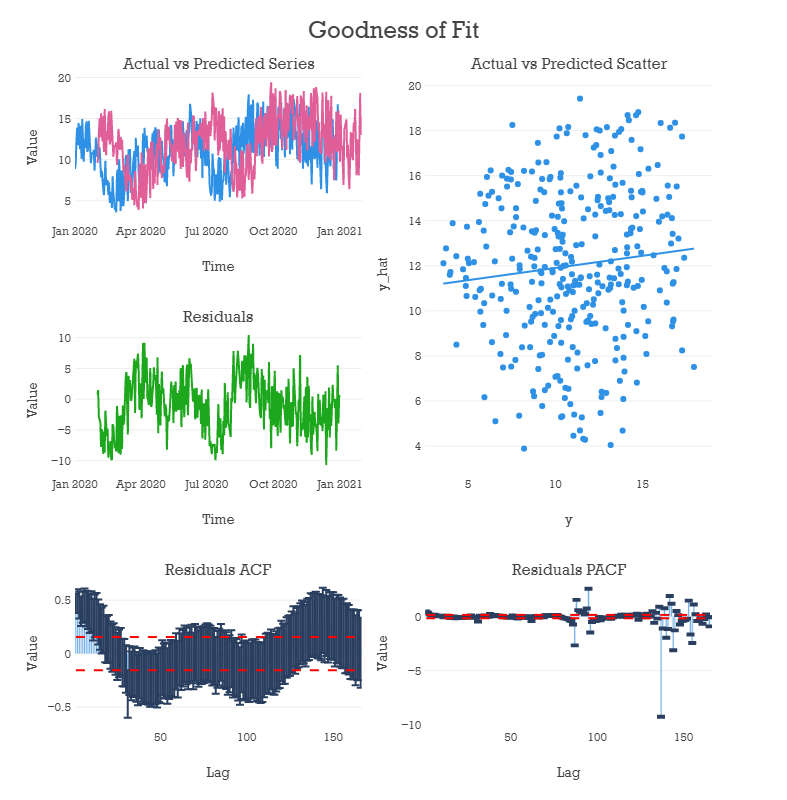

In [29]:
plot_gof(total_df, "y", "y_hat")

In [30]:
import os
from pytsviz.global_vars import root_path
data_path = os.path.join(root_path, "data", "crypto.csv")
from copy import deepcopy
df = pd.read_csv(data_path, index_col=0, parse_dates=True, dayfirst=True)

testing_dict = {
    plot_acf: {
            "df": df,
            "y_col": "LTC"
    },
    plot_psd: {
            "df": df,
            "y_col": "LTC"
    },
    plot_ts_analysis: {
            "df": df,
            "y_col": "LTC"
    },
    plot_distribution: {
            "df": df,
            "y_col": "LTC"
    },
    plot_gof: {
            "df": df,
            "y_col": "LTC",
            "y_hat_col": "LTC_fc"
    },
    plot_ts: {
            "df": df,
            "tf": "moving_average"
    },
    plot_seasonal_ts: {
            "df": df,
            "period": "quarter",
            "y_col": "LTC"
    },
    plot_decomposed_ts: {
            "df": df,
            "method": "STL",
    },
    plot_forecast: {
            "df": df,
            "y_col": "LTC",
            "fc_cols": ["LTC_fc"],
            "lower_col": "LTC_lb",
            "upper_col": "LTC_ub"
    },
    plot_scatter_matrix: {
            "df": df,
            "var1": "LTC",
            "var2": "BTC",
            "lags1": [5],
            "lags2": [5]
    },
    plot_scatter_fit: {
            "df": df,
            "var1": "LTC",
            "var2": "BTC"
    },
    plot_inverse_arma_roots: {
            "process": sm.tsa.ArmaProcess(np.r_[1, np.array([-.75, .25])],  np.r_[1, np.array([.65, .35])])
    },
    plot_extended_scatter_matrix: {
            "df": df
    },
    plot_ts_overview: {
            "series": df["LTC"]
    }
}

<function plot_acf at 0x257AC2F8> {'df':                LTC  LTC_fc   LTC_lb   LTC_ub       BTC     ETH
Date                                                          
2016-04-01    3.23    3.26    3.253    3.261    416.80   11.62
2016-04-02    3.27    3.25    3.242    3.254    420.31   11.61
2016-04-03    3.24    3.24    3.234    3.250    420.65   11.75
2016-04-04    3.25    3.24    3.225    3.245    420.54   11.15
2016-04-05    3.26    3.23    3.217    3.241    424.53   10.40
...            ...     ...      ...      ...       ...     ...
2019-06-26  130.01  126.95  124.606  129.290  12876.00  332.00
2019-06-27  114.63  112.81  110.469  115.157  11198.92  294.86
2019-06-28  119.30  129.06  126.709  131.401  12338.00  308.87
2019-06-29  134.03  144.68  142.330  147.026  11920.00  317.42
2019-06-30  122.61  124.56  122.211  126.911  10805.00  290.80

[1174 rows x 6 columns], 'y_col': 'LTC'}


c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



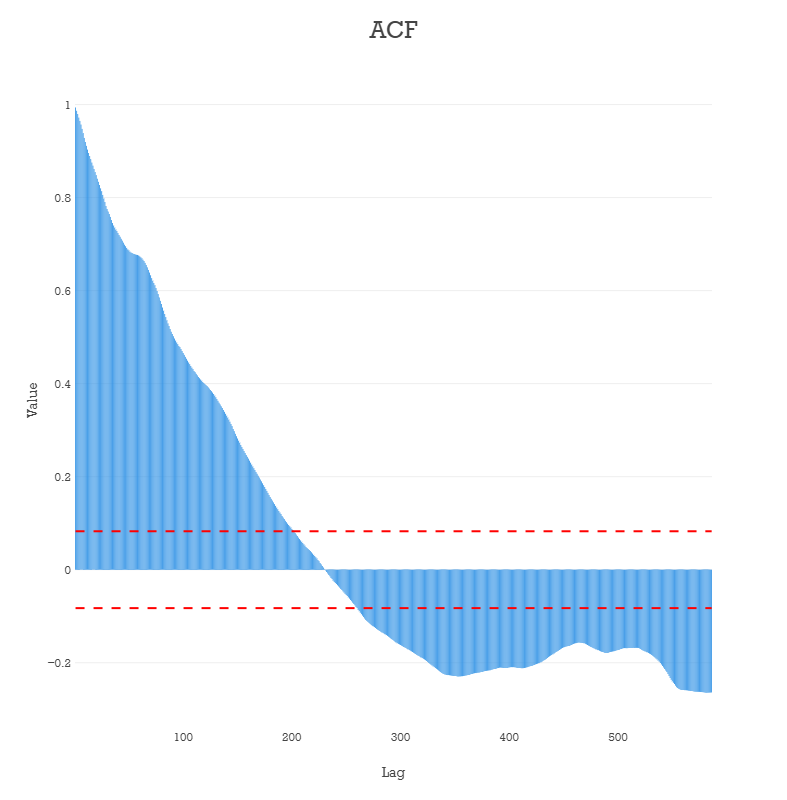

               LTC  LTC_fc   LTC_lb   LTC_ub       BTC     ETH
Date                                                          
2016-04-01    3.23    3.26    3.253    3.261    416.80   11.62
2016-04-02    3.27    3.25    3.242    3.254    420.31   11.61
2016-04-03    3.24    3.24    3.234    3.250    420.65   11.75
2016-04-04    3.25    3.24    3.225    3.245    420.54   11.15
2016-04-05    3.26    3.23    3.217    3.241    424.53   10.40
...            ...     ...      ...      ...       ...     ...
2019-06-26  130.01  126.95  124.606  129.290  12876.00  332.00
2019-06-27  114.63  112.81  110.469  115.157  11198.92  294.86
2019-06-28  119.30  129.06  126.709  131.401  12338.00  308.87
2019-06-29  134.03  144.68  142.330  147.026  11920.00  317.42
2019-06-30  122.61  124.56  122.211  126.911  10805.00  290.80

[1174 rows x 6 columns]                LTC  LTC_fc   LTC_lb   LTC_ub       BTC     ETH
Date                                                          
2016-04-01    3.23    3.26    

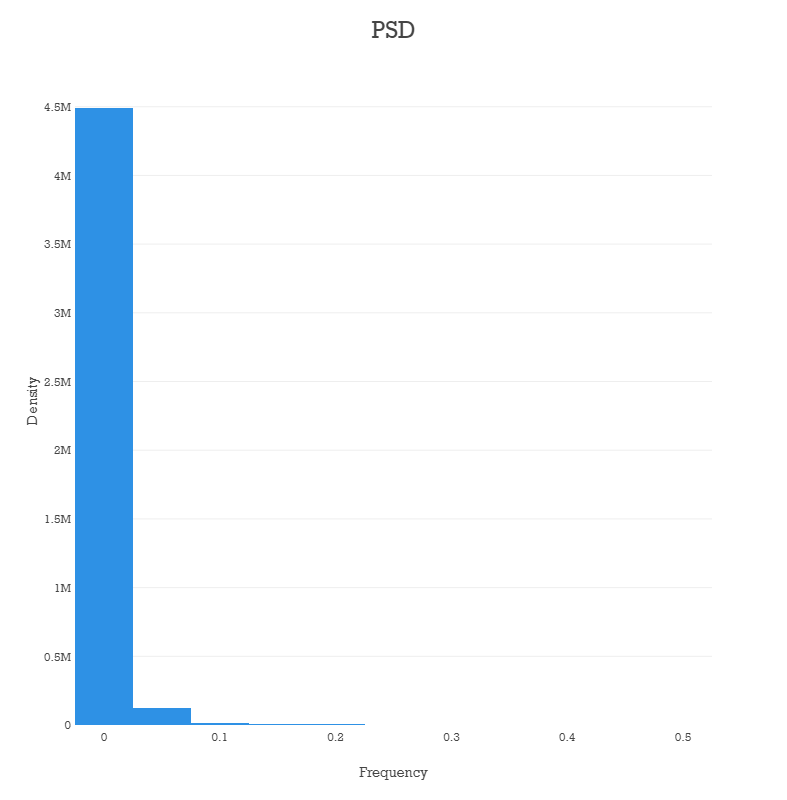

               LTC  LTC_fc   LTC_lb   LTC_ub       BTC     ETH
Date                                                          
2016-04-01    3.23    3.26    3.253    3.261    416.80   11.62
2016-04-02    3.27    3.25    3.242    3.254    420.31   11.61
2016-04-03    3.24    3.24    3.234    3.250    420.65   11.75
2016-04-04    3.25    3.24    3.225    3.245    420.54   11.15
2016-04-05    3.26    3.23    3.217    3.241    424.53   10.40
...            ...     ...      ...      ...       ...     ...
2019-06-26  130.01  126.95  124.606  129.290  12876.00  332.00
2019-06-27  114.63  112.81  110.469  115.157  11198.92  294.86
2019-06-28  119.30  129.06  126.709  131.401  12338.00  308.87
2019-06-29  134.03  144.68  142.330  147.026  11920.00  317.42
2019-06-30  122.61  124.56  122.211  126.911  10805.00  290.80

[1174 rows x 6 columns]                LTC  LTC_fc   LTC_lb   LTC_ub       BTC     ETH
Date                                                          
2016-04-01    3.23    3.26    

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



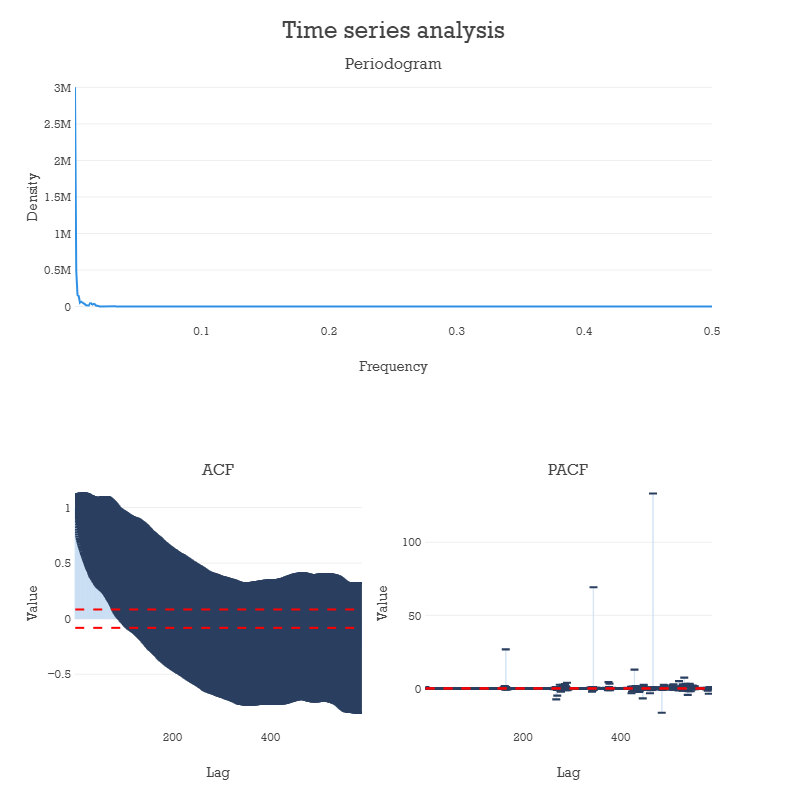

               LTC  LTC_fc   LTC_lb   LTC_ub       BTC     ETH
Date                                                          
2016-04-01    3.23    3.26    3.253    3.261    416.80   11.62
2016-04-02    3.27    3.25    3.242    3.254    420.31   11.61
2016-04-03    3.24    3.24    3.234    3.250    420.65   11.75
2016-04-04    3.25    3.24    3.225    3.245    420.54   11.15
2016-04-05    3.26    3.23    3.217    3.241    424.53   10.40
...            ...     ...      ...      ...       ...     ...
2019-06-26  130.01  126.95  124.606  129.290  12876.00  332.00
2019-06-27  114.63  112.81  110.469  115.157  11198.92  294.86
2019-06-28  119.30  129.06  126.709  131.401  12338.00  308.87
2019-06-29  134.03  144.68  142.330  147.026  11920.00  317.42
2019-06-30  122.61  124.56  122.211  126.911  10805.00  290.80

[1174 rows x 6 columns]                LTC  LTC_fc   LTC_lb   LTC_ub       BTC     ETH
Date                                                          
2016-04-01    3.23    3.26    

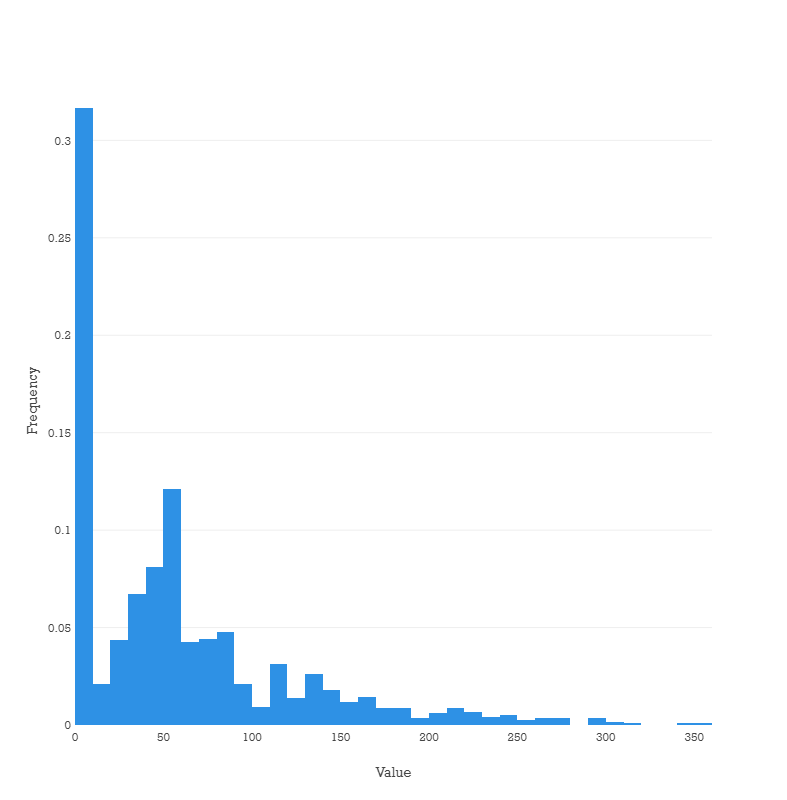

               LTC  LTC_fc   LTC_lb   LTC_ub       BTC     ETH
Date                                                          
2016-04-01    3.23    3.26    3.253    3.261    416.80   11.62
2016-04-02    3.27    3.25    3.242    3.254    420.31   11.61
2016-04-03    3.24    3.24    3.234    3.250    420.65   11.75
2016-04-04    3.25    3.24    3.225    3.245    420.54   11.15
2016-04-05    3.26    3.23    3.217    3.241    424.53   10.40
...            ...     ...      ...      ...       ...     ...
2019-06-26  130.01  126.95  124.606  129.290  12876.00  332.00
2019-06-27  114.63  112.81  110.469  115.157  11198.92  294.86
2019-06-28  119.30  129.06  126.709  131.401  12338.00  308.87
2019-06-29  134.03  144.68  142.330  147.026  11920.00  317.42
2019-06-30  122.61  124.56  122.211  126.911  10805.00  290.80

[1174 rows x 6 columns]                LTC  LTC_fc   LTC_lb   LTC_ub       BTC     ETH
Date                                                          
2016-04-01    3.23    3.26    

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



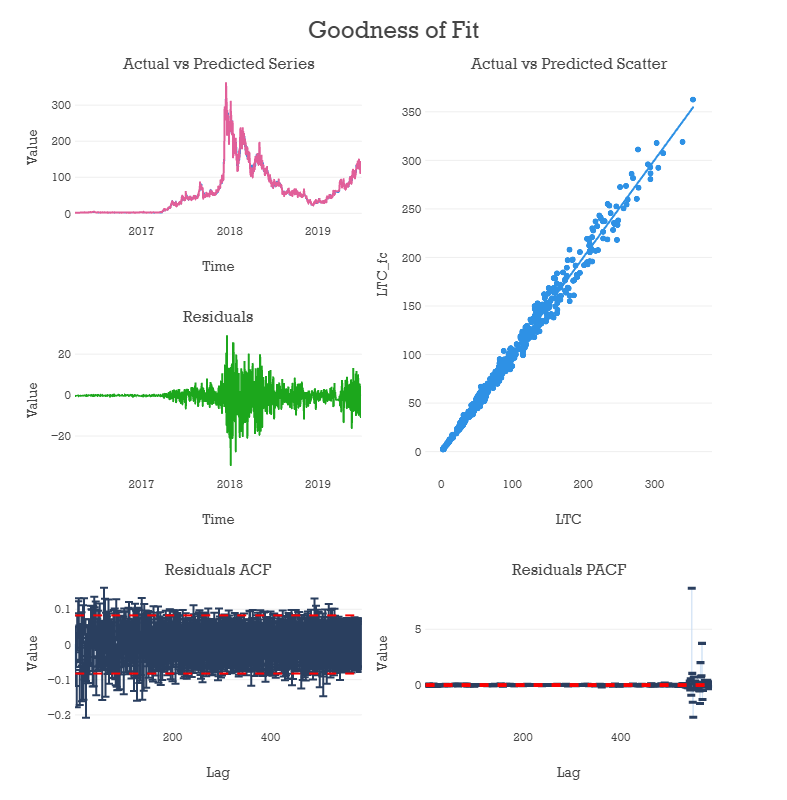

               LTC  LTC_fc   LTC_lb   LTC_ub       BTC     ETH
Date                                                          
2016-04-01    3.23    3.26    3.253    3.261    416.80   11.62
2016-04-02    3.27    3.25    3.242    3.254    420.31   11.61
2016-04-03    3.24    3.24    3.234    3.250    420.65   11.75
2016-04-04    3.25    3.24    3.225    3.245    420.54   11.15
2016-04-05    3.26    3.23    3.217    3.241    424.53   10.40
...            ...     ...      ...      ...       ...     ...
2019-06-26  130.01  126.95  124.606  129.290  12876.00  332.00
2019-06-27  114.63  112.81  110.469  115.157  11198.92  294.86
2019-06-28  119.30  129.06  126.709  131.401  12338.00  308.87
2019-06-29  134.03  144.68  142.330  147.026  11920.00  317.42
2019-06-30  122.61  124.56  122.211  126.911  10805.00  290.80

[1174 rows x 6 columns]                LTC  LTC_fc   LTC_lb   LTC_ub       BTC     ETH
Date                                                          
2016-04-01    3.23    3.26    

TypeError: moving_average() missing 1 required positional argument: 'w'

In [31]:
for func_dict in testing_dict.items():
    func, kwargs = func_dict
    print(func, kwargs)
    processed_kwargs = deepcopy(kwargs)
    func(**processed_kwargs)
    
    for k in kwargs.keys():
        print(kwargs[k], processed_kwargs[k])


In [ ]:
total_df.filter("y_hat")